In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Step 1: Load and Clean Data
def load_injury_data(filepath):
    '''
    Takes in filepath to injury data and returns cleaned DataFrame with columns, 'Player', 
    'Team', 'Date', 'Return Date', and 'Injury'.
    '''
    df = pd.read_csv(filepath)
    df = df.rename(columns={'Relinquished': 'Player', 'Notes': 'Injury'})
    df = df[['Player', 'Team', 'Date', 'Injury']]
    return df

def load_team_stats(filepath):
    '''
    Takes in filepath to team stats data and returns cleaned DataFrame with columns, 'TEAM', 
    'SEASON', and 'W-PCT'.
    '''
    df = pd.read_csv(filepath)
    df = df[['Team', 'Season', 'W/L%']]    
    return df

def load_team_performance(filepath):
    '''
    Takes in filepath to team performance data and returns cleaned DataFrame with columns, 'TEAM', 
    'SEASON', 'BENCH_PTS', and 'BENCH_MIN'.
    '''
    df = pd.read_csv(filepath)
    df = df[['Team', 'Year', 'Pace', 'OPtg', 'DRtg']]
    return df

# Load Data
injuries = load_injury_data('data/nba_injuries.csv')
team_stats = load_team_stats('data/Team_Records.csv')
team_perf = load_team_performance('data/advanced_stats_total.csv')

# Step 2: Merge Datasets
def merge_datasets(injuries_df, stats_df, bench_df):
    injuries_df = injuries_df.groupby(['Team', 'Season']).reset_index(name='Injury_Count')
    merged = stats_df.merge(injuries_df, left_on=['Team', 'Season'], right_on=['Team', 'Season'], 
                            how='left')
    merged = merged.merge(bench_df, on=['Team', 'Season'], how='left')
    return merged

In [11]:
def compute_injury_rate(df):
    '''
    Takes in merged DataFrame and returns the DataFrame with an added column, average injury
    count per game assuming an 82 game season.
    '''
    df.loc[df['Injury_Count'] == 'N/A', 'Injury_Count'] = 0
    
    df['Injury_Rate'] = df['Injury_Count'] / 82
    return df

In [3]:
# Hypothesis Testing
def run_hypotesis_tests(df):

SyntaxError: incomplete input (2040543147.py, line 2)

In [21]:
def plot_injury_vs_win_pct(df):
    plot = sns.relplot(data=df, x='Injury_Count', y='W_PCT')
    plot.set(xlabel='Injury Count', ylabel='Win Percentage', title='Injury Count vs Win Percentage')
    plt.show()
    

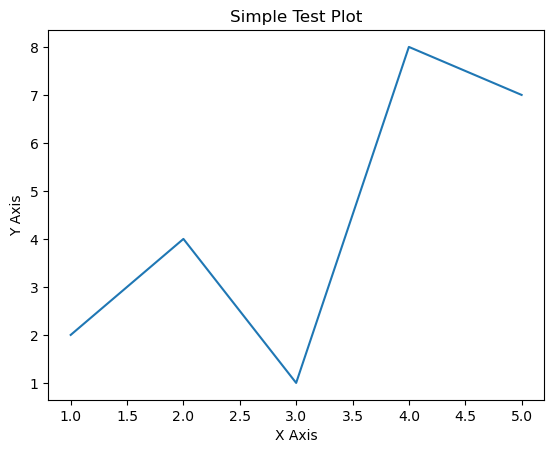

In [22]:
# Basic test data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 8, 7]

# Simple line plot
plt.plot(x, y)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Simple Test Plot')
plt.show()